# Exploring ML models to predict survival on the Titanic

Data science compentition of the website Kaggle to produce the best model to predict survival on the titanic. 

Three datasets availible
- Train set: with column indicating survivors
- Test set:  without column indicating survivors
- Example submission set: indicate the submission layout of the csv

In [66]:
# import the modules and load in the data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Train = pd.read_csv('train.csv')
Test  = pd.read_csv('test.csv')
submission_example = pd.read_csv('gender_submission.csv')

In [67]:
# Basic data exploration of Train and test. We'll review the example at the end

Train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
Test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<b>As expected the test dataset lack the 'Survived' column</b>

In [69]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [71]:
Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [72]:
Train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Molson, Mr. Harry Markland",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


# Initial observations

Train set:
- Name & PassengrId are unique values and will not be useful for the model; columns can be dropped.
- Ticket number is mainly consists of unique values and will not be of use for modeling. 
- Several Nan values in Age. Imputing these rows will be probably the best options. 
- Cabin would have been an interesting column, since your location on the ship would a reasonable estimate of how easy you could reach the life boats. Alas cabin is known for only ~23% of passenger and imputing these values is not a good option when so many values are missing. I'll drop the column
- Embarked column is missing 2 values, we'll impute these with most frequent value

Test set:
- missing values in the Age column. Need to be imputing.
- Cabin column again has many empty values, but since we'll not be using this column in the analysis, this will not be a concern.


### Exploring different parameters in relation to "Survived"

In [73]:
#Survived

Train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [74]:
# Pclass vs Survived

pd.pivot_table(Train, index='Pclass', values='Survived')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [75]:
# Sex vs Survived

pd.pivot_table(Train, index='Sex', values='Survived')

,Survived
Sex,
female,0.742038
male,0.188908


In [76]:
# Embarked vs Survived

pd.pivot_table(Train, index='Embarked', values='Survived')

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


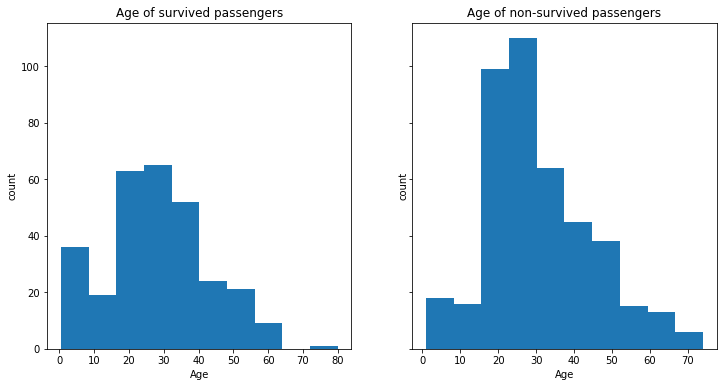

In [77]:
# Age vs Survived

Surv_age = Train[Train['Survived']==1]['Age']
No_Surv_age = Train[Train['Survived']==0]['Age']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,6], sharey=True)
ax1.hist(Surv_age)
ax2.hist(No_Surv_age)
ax1.set_title('Age of survived passengers')
ax2.set_title('Age of non-survived passengers')
ax1.set_ylabel('count')
ax1.set_xlabel('Age')
ax2.set_ylabel('count')
ax2.set_xlabel('Age')
plt.show()

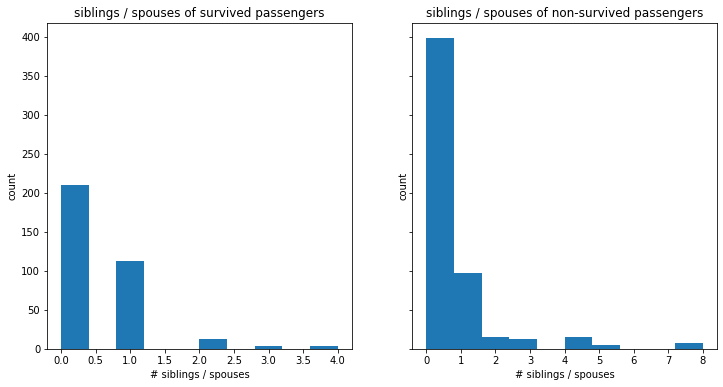

In [78]:
#SibSp vs Survived

Surv_age = Train[Train['Survived']==1]['SibSp']
No_Surv_age = Train[Train['Survived']==0]['SibSp']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,6], sharey=True)
ax1.hist(Surv_age)
ax2.hist(No_Surv_age)
ax1.set_title('siblings / spouses of survived passengers')
ax2.set_title('siblings / spouses of non-survived passengers')
ax1.set_ylabel('count')
ax1.set_xlabel('# siblings / spouses')
ax2.set_ylabel('count')
ax2.set_xlabel('# siblings / spouses')
plt.show()

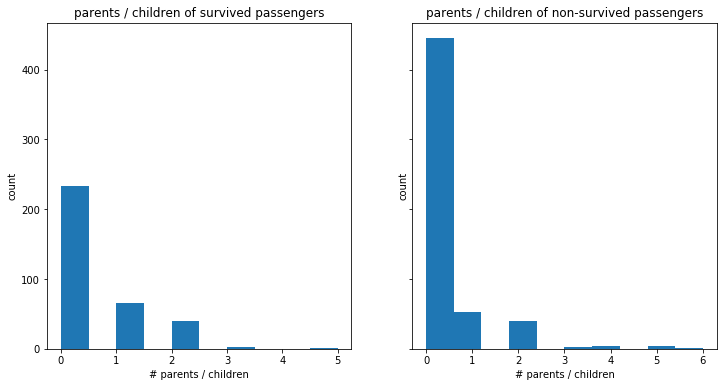

In [79]:
#Parch vs Survived

Surv_age = Train[Train['Survived']==1]['Parch']
No_Surv_age = Train[Train['Survived']==0]['Parch']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,6], sharey=True)
ax1.hist(Surv_age)
ax2.hist(No_Surv_age)
ax1.set_title('parents / children of survived passengers')
ax2.set_title('parents / children of non-survived passengers')
ax1.set_ylabel('count')
ax1.set_xlabel('# parents / children')
ax2.set_ylabel('count')
ax2.set_xlabel('# parents / children')
plt.show()

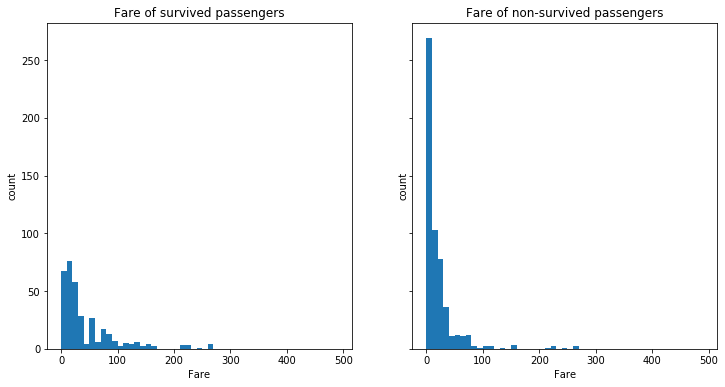

In [80]:
#Fare vs Survived

Surv_age = Train[Train['Survived']==1]['Fare']
No_Surv_age = Train[Train['Survived']==0]['Fare']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,6], sharey=True)
ax1.hist(Surv_age, bins =range(0,500,10))
ax2.hist(No_Surv_age,bins =range(0,500,10))
ax1.set_title('Fare of survived passengers')
ax2.set_title('Fare of non-survived passengers')
ax1.set_ylabel('count')
ax1.set_xlabel('Fare')
ax2.set_ylabel('count')
ax2.set_xlabel('Fare')
plt.show()

# Parameter relation with survived

~61% did not survive

<b>Age:</b>       Pclass has a clear relation with survived where the higher the class, the more likely someone survived.<br> 
<b>Sex:</b>       Gender has the strongest relation with majority of women surviving<br> 
<b>Age:</b>       On first glance not really a strong determiner, but childeren and elderly had a better chance of surviving<br> 
<b>SibSp:</b>     Weak relation, but in general those without siblings/spouse had a worse chance<br> 
<b>Parch:</b>     Weak relation, but in general those without parents/childeren had a worse chance<br> 
<b>Fare:</b>      lower fare is higher chance of dying. Strongly related to Class<br> 
<b>Embarked:</b>  Those embarked at port "C" had a better chance of surviving<br> 
<br> 
<b>Best chance to survive is:</b>
- Rich women in first class that embarked in port C and has familiy on board

# Transforming the data to suit ML

Missing values:
- Age is missing ~20% of its values. Will impute with the median
- Embarked is missing 2 values. Will replace with most common values, which we already known as "S" 

Categorical columns:
- Sex will be labeled with 0 or 1 
- Onehot Encoding will be applyed to the Embarked column

All transformation will be applied to both Train and test, with the exeption of imputing Embarked in the test. Test has no missing values in "Embarked"  

In [81]:
#Selection of relevant columns

Y = Train.Survived.copy()
X = Train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Embarked']].copy()
X_valid = Test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Embarked']].copy()

# Transform Sex column
X.Sex = X.Sex.map({'female': 0, 'male':1})
X_valid.Sex = X_valid.Sex.map({'female': 0, 'male':1})

#Tranform Embarked
# impute empty rows
X.Embarked = X.Embarked.fillna("S")

# Encode Embarked column
dummies = pd.get_dummies(X.Embarked)
X.drop('Embarked', axis=1, inplace=True)
X = pd.concat([X, dummies], axis=1)

dummies2 = pd.get_dummies(X_valid.Embarked)
X_valid.drop('Embarked', axis=1, inplace=True)
X_valid = pd.concat([X_valid, dummies2], axis=1)

In [82]:
X.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1


In [83]:
# checking of there is a difference in age distribution between male and females

pd.pivot_table(Train, index='Sex', values='Age', aggfunc=[np.mean, np.median, np.std])

,mean,median,std
,Age,Age,Age
Sex,,,
female,27.915709,27.0,14.110146
male,30.726645,29.0,14.678201


In [84]:
# Minor sex difference. Will use mean

X.Age = X.Age.fillna(X.Age.mean())
X_valid.Age = X_valid.Age.fillna(X_valid.Age.mean())

In [85]:
### !!! need to check

X_valid.Fare = X_valid.Fare.fillna(X_valid.Fare.median())


# Running models

In [86]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass    418 non-null int64
Sex       418 non-null int64
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
C         418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [87]:
from sklearn.ensemble import RandomForestClassifier  

RFR = RandomForestClassifier(n_estimators=50)

RFR.fit(X,Y)
RFR_pred = RFR.predict(X_valid)
acc_log = round(RFR.score(X, Y) * 100, 2)
print(acc_log)

98.09


In [88]:
submission = pd.DataFrame({ "PassengerId": Test["PassengerId"], "Survived": RFR_pred})
submission.to_csv('submission.csv', index=False)

# Feedback from competition 

Score of 0.75598 meaning an accuracy of 76%, which is not too bad for a quick dirty run 